<a href="https://colab.research.google.com/github/Praveen8824/stock_price_precidition_nifty50/blob/main/7_days_Stock_market_Price_Prediciton_praveen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Choose a stock for prediction:
RELIANCE.NS
TCS.NS
HDFCBANK.NS
INFY.NS
HINDUNILVR.NS
ICICIBANK.NS
KOTAKBANK.NS
SBIN.NS
BAJFINANCE.NS
BHARTIARTL.NS
HCLTECH.NS
ITC.NS
ASIANPAINT.NS
AXISBANK.NS
LT.NS
MARUTI.NS
ULTRACEMCO.NS
SUNPHARMA.NS
HDFCLIFE.NS
WIPRO.NS
NESTLEIND.NS
POWERGRID.NS
BAJAJFINSV.NS
ADANIGREEN.NS
TITAN.NS
DIVISLAB.NS
NTPC.NS
TECHM.NS
ADANIPORTS.NS
GRASIM.NS
BPCL.NS
JSWSTEEL.NS
HEROMOTOCO.NS
TATAMOTORS.NS
HINDALCO.NS
UPL.NS
ONGC.NS
SHREECEM.NS
SBILIFE.NS
COALINDIA.NS
DRREDDY.NS
BRITANNIA.NS
EICHERMOT.NS
M&M.NS
CIPLA.NS
INDUSINDBK.NS
TATACONSUM.NS
BAJAJ-AUTO.NS
APOLLOHOSP.NS
Enter the stock symbol for prediction (e.g., TCS.NS): CIPLA.NS
You selected: CIPLA.NS
Future dates for prediction: DatetimeIndex(['2024-06-11 10:13:21.667185', '2024-06-12 10:13:21.667185',
               '2024-06-13 10:13:21.667185'],
              dtype='datetime64[ns]', freq='D')
Future data for prediction:
                                    MA5         MA10   Return
2024-06-11 10:13:21.667185  1477.219

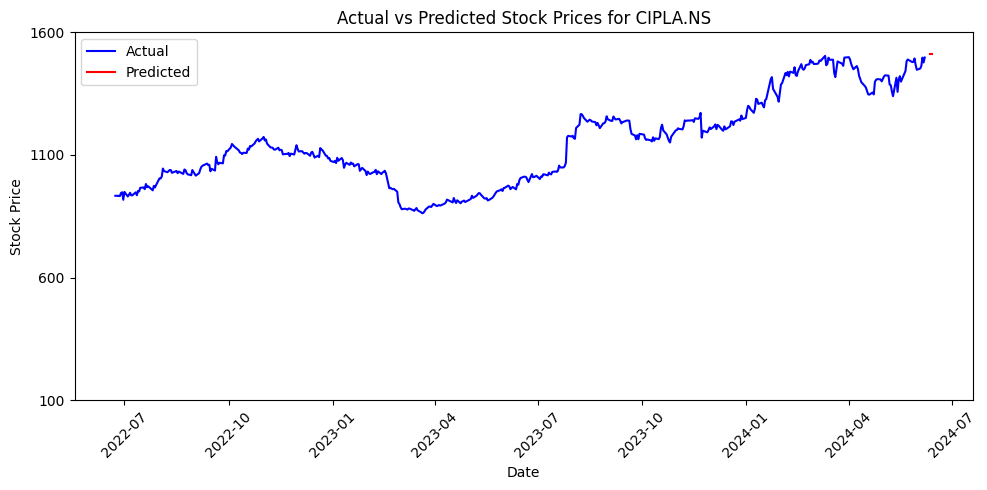

In [3]:
import yfinance as yf
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

# Function to download historical stock data
def download_stock_data(symbol, start_date, end_date):
    try:
        return yf.download(symbol, start=start_date, end=end_date)
    except Exception as e:
        print(f"Failed to download data for {symbol}: {e}")
        return None

# Get the list of NIFTY 50 stock symbols
nifty_50_symbols = [
    "RELIANCE.NS", "TCS.NS", "HDFCBANK.NS", "INFY.NS", "HINDUNILVR.NS",
    "ICICIBANK.NS", "KOTAKBANK.NS", "SBIN.NS", "BAJFINANCE.NS", "BHARTIARTL.NS",
    "HCLTECH.NS", "ITC.NS", "ASIANPAINT.NS", "AXISBANK.NS", "LT.NS",
    "MARUTI.NS", "ULTRACEMCO.NS", "SUNPHARMA.NS", "HDFCLIFE.NS", "WIPRO.NS",
    "NESTLEIND.NS", "POWERGRID.NS", "BAJAJFINSV.NS", "ADANIGREEN.NS", "TITAN.NS",
    "DIVISLAB.NS", "NTPC.NS", "TECHM.NS", "ADANIPORTS.NS", "GRASIM.NS",
    "BPCL.NS", "JSWSTEEL.NS", "HEROMOTOCO.NS", "TATAMOTORS.NS", "HINDALCO.NS",
    "UPL.NS", "ONGC.NS", "SHREECEM.NS", "SBILIFE.NS", "COALINDIA.NS",
    "DRREDDY.NS", "BRITANNIA.NS", "EICHERMOT.NS", "M&M.NS", "CIPLA.NS",
    "INDUSINDBK.NS", "TATACONSUM.NS", "BAJAJ-AUTO.NS", "APOLLOHOSP.NS"
]

# Define the time period (previous year till present)
start_date = pd.Timestamp.now() - pd.DateOffset(years=2)
end_date = pd.Timestamp.now()

# Download historical stock data for all NIFTY 50 stocks
stock_data = {}
for symbol in nifty_50_symbols:
    data = download_stock_data(symbol, start_date, end_date)
    if data is not None:
        stock_data[symbol] = data

# Combine all stock data into a single DataFrame
combined_data = pd.concat(stock_data.values(), keys=stock_data.keys(), names=['Stock', 'Date'])

# Calculate rolling mean and percentage change
combined_data['MA5'] = combined_data.groupby('Stock')['Close'].transform(lambda x: x.rolling(window=5).mean())
combined_data['MA10'] = combined_data.groupby('Stock')['Close'].transform(lambda x: x.rolling(window=10).mean())
combined_data['Return'] = combined_data.groupby('Stock')['Close'].transform(lambda x: x.pct_change())

# Drop rows with missing values
combined_data.dropna(inplace=True)

# Define features and target
X = combined_data[['MA5', 'MA10', 'Return']]
y = combined_data['Close']

# Train the model
model = xgb.XGBRegressor()
model.fit(X, y)

# User chooses the stock for prediction
print("Choose a stock for prediction:")
for symbol in nifty_50_symbols:
    print(symbol)

selected_stock_symbol = input("Enter the stock symbol for prediction (e.g., TCS.NS): ")
print(f"You selected: {selected_stock_symbol}")

# Filter data for the selected stock
selected_stock_data = combined_data.loc[selected_stock_symbol]

# Prepare data for future prediction
future_dates = pd.date_range(end_date, periods=4)[1:]  # Predict for the next 3 days
print(f"Future dates for prediction: {future_dates}")

last_known_data = selected_stock_data.iloc[-10:]  # Get the last 10 days for calculating rolling features
future_data = pd.DataFrame(index=future_dates, columns=['MA5', 'MA10', 'Return'])

future_data['MA5'] = last_known_data['Close'].rolling(window=5).mean().iloc[-1]
future_data['MA10'] = last_known_data['Close'].rolling(window=10).mean().iloc[-1]
future_data['Return'] = last_known_data['Close'].pct_change().iloc[-1]

# Fill missing future data with the last known values for simplicity
future_data.fillna(method='ffill', inplace=True)

print("Future data for prediction:")
print(future_data)

predicted_prices = model.predict(future_data)

print("Predicted Prices:")
print(predicted_prices)

# Plot actual and predicted prices
plt.figure(figsize=(10, 5))
plt.plot(selected_stock_data.index, selected_stock_data['Close'], label='Actual', color='blue')
plt.plot(future_dates, predicted_prices, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f'Actual vs Predicted Stock Prices for {selected_stock_symbol}')
plt.legend()
plt.xticks(rotation=45)
plt.yticks(range(100, 2001, 500))  # Set y-axis ticks according to the specified price frame
plt.tight_layout()
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Choose a stock for prediction:
RELIANCE.NS
TCS.NS
HDFCBANK.NS
INFY.NS
HINDUNILVR.NS
ICICIBANK.NS
KOTAKBANK.NS
SBIN.NS
BAJFINANCE.NS
BHARTIARTL.NS
HCLTECH.NS
ITC.NS
ASIANPAINT.NS
AXISBANK.NS
LT.NS
MARUTI.NS
ULTRACEMCO.NS
SUNPHARMA.NS
HDFCLIFE.NS
WIPRO.NS
NESTLEIND.NS
POWERGRID.NS
BAJAJFINSV.NS
ADANIGREEN.NS
TITAN.NS
DIVISLAB.NS
NTPC.NS
TECHM.NS
ADANIPORTS.NS
GRASIM.NS
BPCL.NS
JSWSTEEL.NS
HEROMOTOCO.NS
TATAMOTORS.NS
HINDALCO.NS
UPL.NS
ONGC.NS
SHREECEM.NS
SBILIFE.NS
COALINDIA.NS
DRREDDY.NS
BRITANNIA.NS
EICHERMOT.NS
M&M.NS
CIPLA.NS
INDUSINDBK.NS
TATACONSUM.NS
BAJAJ-AUTO.NS
ADANITRANS.NS
APOLLOHOSP.NS
Enter the stock symbol for prediction (e.g., TCS.NS): CIPLA.NS
You selected: CIPLA.NS
Future dates for prediction: DatetimeIndex(['2024-06-11 10:14:09.661729', '2024-06-12 10:14:09.661729',
               '2024-06-13 10:14:09.661729', '2024-06-14 10:14:09.661729',
               '2024-06-15 10:14:09.661729', '2024-06-16 10:14:09.661729',
               '2024-06-17 10:14:09.661729'],
          

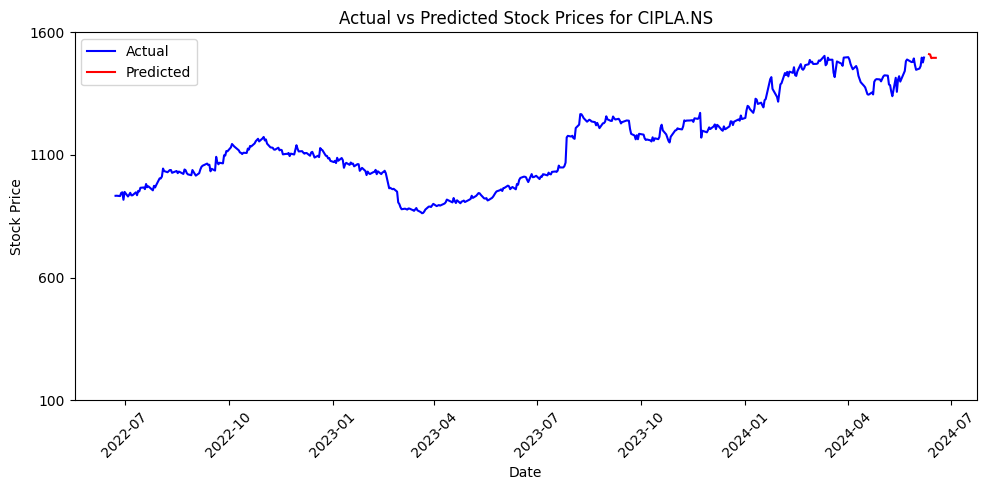

In [4]:
import yfinance as yf
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

# Function to download historical stock data
def download_stock_data(symbol, start_date, end_date):
    try:
        return yf.download(symbol, start=start_date, end=end_date)
    except Exception as e:
        print(f"Failed to download data for {symbol}: {e}")
        return None

# Get the list of NIFTY 50 stock symbols
nifty_50_symbols = [
    "RELIANCE.NS", "TCS.NS", "HDFCBANK.NS", "INFY.NS", "HINDUNILVR.NS",
    "ICICIBANK.NS", "KOTAKBANK.NS", "SBIN.NS", "BAJFINANCE.NS", "BHARTIARTL.NS",
    "HCLTECH.NS", "ITC.NS", "ASIANPAINT.NS", "AXISBANK.NS", "LT.NS",
    "MARUTI.NS", "ULTRACEMCO.NS", "SUNPHARMA.NS", "HDFCLIFE.NS", "WIPRO.NS",
    "NESTLEIND.NS", "POWERGRID.NS", "BAJAJFINSV.NS", "ADANIGREEN.NS", "TITAN.NS",
    "DIVISLAB.NS", "NTPC.NS", "TECHM.NS", "ADANIPORTS.NS", "GRASIM.NS",
    "BPCL.NS", "JSWSTEEL.NS", "HEROMOTOCO.NS", "TATAMOTORS.NS", "HINDALCO.NS",
    "UPL.NS", "ONGC.NS", "SHREECEM.NS", "SBILIFE.NS", "COALINDIA.NS",
    "DRREDDY.NS", "BRITANNIA.NS", "EICHERMOT.NS", "M&M.NS", "CIPLA.NS",
    "INDUSINDBK.NS", "TATACONSUM.NS", "BAJAJ-AUTO.NS", "ADANITRANS.NS", "APOLLOHOSP.NS"
]

# Define the time period (previous year till present)
start_date = pd.Timestamp.now() - pd.DateOffset(years=2)
end_date = pd.Timestamp.now()

# Download historical stock data for all NIFTY 50 stocks
stock_data = {}
for symbol in nifty_50_symbols:
    data = download_stock_data(symbol, start_date, end_date)
    if data is not None:
        stock_data[symbol] = data

# Combine all stock data into a single DataFrame
combined_data = pd.concat(stock_data.values(), keys=stock_data.keys(), names=['Stock', 'Date'])

# Calculate rolling mean and percentage change
combined_data['MA5'] = combined_data.groupby('Stock')['Close'].transform(lambda x: x.rolling(window=5).mean())
combined_data['MA10'] = combined_data.groupby('Stock')['Close'].transform(lambda x: x.rolling(window=10).mean())
combined_data['Return'] = combined_data.groupby('Stock')['Close'].transform(lambda x: x.pct_change())

# Drop rows with missing values
combined_data.dropna(inplace=True)

# Define features and target
X = combined_data[['MA5', 'MA10', 'Return']]
y = combined_data['Close']

# Train the model
model = xgb.XGBRegressor()
model.fit(X, y)

# User chooses the stock for prediction
print("Choose a stock for prediction:")
for symbol in nifty_50_symbols:
    print(symbol)

selected_stock_symbol = input("Enter the stock symbol for prediction (e.g., TCS.NS): ")
print(f"You selected: {selected_stock_symbol}")

# Filter data for the selected stock
selected_stock_data = combined_data.loc[selected_stock_symbol]

# Prepare data for future prediction
future_dates = pd.date_range(end_date, periods=8)[1:]  # Predict for the next 7 days
print(f"Future dates for prediction: {future_dates}")

# Initialize future data DataFrame
future_data = pd.DataFrame(index=future_dates, columns=['MA5', 'MA10', 'Return'])

# Get the last known data
last_known_data = selected_stock_data.iloc[-10:]  # Get the last 10 days for calculating rolling features

# Calculate the initial values for the future data
ma5 = last_known_data['Close'].rolling(window=5).mean().iloc[-1]
ma10 = last_known_data['Close'].rolling(window=10).mean().iloc[-1]
ret = last_known_data['Close'].pct_change().iloc[-1]

for i in range(len(future_data)):
    future_data.iloc[i] = [ma5, ma10, ret]
    # Update MA5, MA10, and Return for the next day
    last_close = future_data.iloc[i-1]['MA5'] if i > 0 else last_known_data['Close'].iloc[-1]
    ma5 = ((ma5 * 4) + last_close) / 5  # Update MA5
    ma10 = ((ma10 * 9) + last_close) / 10  # Update MA10
    ret = (last_close - ma5) / ma5  # Update Return

# Ensure future_data is of type float
future_data = future_data.astype(float)

print("Future data for prediction:")
print(future_data)

predicted_prices = model.predict(future_data)

print("Predicted Prices:")
print(predicted_prices)

# Plot actual and predicted prices
plt.figure(figsize=(10, 5))
plt.plot(selected_stock_data.index, selected_stock_data['Close'], label='Actual', color='blue')
plt.plot(future_dates, predicted_prices, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f'Actual vs Predicted Stock Prices for {selected_stock_symbol}')
plt.legend()
plt.xticks(rotation=45)
plt.yticks(range(100, 2001, 500))  # Set y-axis ticks according to the specified price frame
plt.tight_layout()
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Choose a stock for prediction:
RELIANCE.NS
TCS.NS
HDFCBANK.NS
INFY.NS
HINDUNILVR.NS
ICICIBANK.NS
KOTAKBANK.NS
SBIN.NS
BAJFINANCE.NS
BHARTIARTL.NS
HCLTECH.NS
ITC.NS
ASIANPAINT.NS
AXISBANK.NS
LT.NS
MARUTI.NS
ULTRACEMCO.NS
SUNPHARMA.NS
HDFCLIFE.NS
WIPRO.NS
NESTLEIND.NS
POWERGRID.NS
BAJAJFINSV.NS
ADANIGREEN.NS
TITAN.NS
DIVISLAB.NS
NTPC.NS
TECHM.NS
ADANIPORTS.NS
GRASIM.NS
BPCL.NS
JSWSTEEL.NS
HEROMOTOCO.NS
TATAMOTORS.NS
HINDALCO.NS
UPL.NS
ONGC.NS
SHREECEM.NS
SBILIFE.NS
COALINDIA.NS
DRREDDY.NS
BRITANNIA.NS
EICHERMOT.NS
M&M.NS
CIPLA.NS
INDUSINDBK.NS
TATACONSUM.NS
BAJAJ-AUTO.NS
ADANITRANS.NS
APOLLOHOSP.NS
Enter the stock symbol for prediction (e.g., TCS.NS): CIPLA.NS
You selected: CIPLA.NS
Future dates for prediction: DatetimeIndex(['2024-06-11 10:14:33.799613', '2024-06-12 10:14:33.799613',
               '2024-06-13 10:14:33.799613', '2024-06-14 10:14:33.799613',
               '2024-06-15 10:14:33.799613', '2024-06-16 10:14:33.799613',
               '2024-06-17 10:14:33.799613'],
          

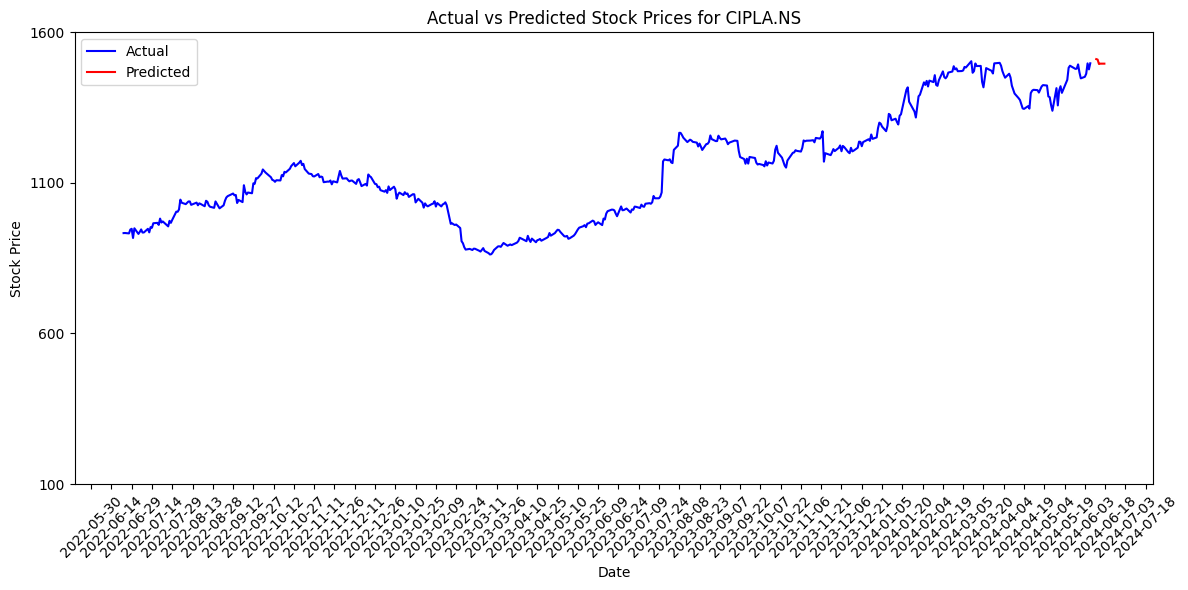

In [5]:
import yfinance as yf
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Function to download historical stock data
def download_stock_data(symbol, start_date, end_date):
    try:
        return yf.download(symbol, start=start_date, end=end_date)
    except Exception as e:
        print(f"Failed to download data for {symbol}: {e}")
        return None

# Get the list of NIFTY 50 stock symbols
nifty_50_symbols = [
    "RELIANCE.NS", "TCS.NS", "HDFCBANK.NS", "INFY.NS", "HINDUNILVR.NS",
    "ICICIBANK.NS", "KOTAKBANK.NS", "SBIN.NS", "BAJFINANCE.NS", "BHARTIARTL.NS",
    "HCLTECH.NS", "ITC.NS", "ASIANPAINT.NS", "AXISBANK.NS", "LT.NS",
    "MARUTI.NS", "ULTRACEMCO.NS", "SUNPHARMA.NS", "HDFCLIFE.NS", "WIPRO.NS",
    "NESTLEIND.NS", "POWERGRID.NS", "BAJAJFINSV.NS", "ADANIGREEN.NS", "TITAN.NS",
    "DIVISLAB.NS", "NTPC.NS", "TECHM.NS", "ADANIPORTS.NS", "GRASIM.NS",
    "BPCL.NS", "JSWSTEEL.NS", "HEROMOTOCO.NS", "TATAMOTORS.NS", "HINDALCO.NS",
    "UPL.NS", "ONGC.NS", "SHREECEM.NS", "SBILIFE.NS", "COALINDIA.NS",
    "DRREDDY.NS", "BRITANNIA.NS", "EICHERMOT.NS", "M&M.NS", "CIPLA.NS",
    "INDUSINDBK.NS", "TATACONSUM.NS", "BAJAJ-AUTO.NS", "ADANITRANS.NS", "APOLLOHOSP.NS"
]

# Define the time period (previous year till present)
start_date = pd.Timestamp.now() - pd.DateOffset(years=2)
end_date = pd.Timestamp.now()

# Download historical stock data for all NIFTY 50 stocks
stock_data = {}
for symbol in nifty_50_symbols:
    data = download_stock_data(symbol, start_date, end_date)
    if data is not None:
        stock_data[symbol] = data

# Combine all stock data into a single DataFrame
combined_data = pd.concat(stock_data.values(), keys=stock_data.keys(), names=['Stock', 'Date'])

# Calculate rolling mean and percentage change
combined_data['MA5'] = combined_data.groupby('Stock')['Close'].transform(lambda x: x.rolling(window=5).mean())
combined_data['MA10'] = combined_data.groupby('Stock')['Close'].transform(lambda x: x.rolling(window=10).mean())
combined_data['Return'] = combined_data.groupby('Stock')['Close'].transform(lambda x: x.pct_change())

# Drop rows with missing values
combined_data.dropna(inplace=True)

# Define features and target
X = combined_data[['MA5', 'MA10', 'Return']]
y = combined_data['Close']

# Train the model
model = xgb.XGBRegressor()
model.fit(X, y)

# User chooses the stock for prediction
print("Choose a stock for prediction:")
for symbol in nifty_50_symbols:
    print(symbol)

selected_stock_symbol = input("Enter the stock symbol for prediction (e.g., TCS.NS): ")
print(f"You selected: {selected_stock_symbol}")

# Filter data for the selected stock
selected_stock_data = combined_data.loc[selected_stock_symbol]

# Prepare data for future prediction
future_dates = pd.date_range(end_date, periods=8)[1:]  # Predict for the next 7 days
print(f"Future dates for prediction: {future_dates}")

# Initialize future data DataFrame
future_data = pd.DataFrame(index=future_dates, columns=['MA5', 'MA10', 'Return'])

# Get the last known data
last_known_data = selected_stock_data.iloc[-10:]  # Get the last 10 days for calculating rolling features

# Calculate the initial values for the future data
ma5 = last_known_data['Close'].rolling(window=5).mean().iloc[-1]
ma10 = last_known_data['Close'].rolling(window=10).mean().iloc[-1]
ret = last_known_data['Close'].pct_change().iloc[-1]

for i in range(len(future_data)):
    future_data.iloc[i] = [ma5, ma10, ret]
    # Update MA5, MA10, and Return for the next day
    last_close = future_data.iloc[i-1]['MA5'] if i > 0 else last_known_data['Close'].iloc[-1]
    ma5 = ((ma5 * 4) + last_close) / 5  # Update MA5
    ma10 = ((ma10 * 9) + last_close) / 10  # Update MA10
    ret = (last_close - ma5) / ma5  # Update Return

# Ensure future_data is of type float
future_data = future_data.astype(float)

print("Future data for prediction:")
print(future_data)

predicted_prices = model.predict(future_data)

print("Predicted Prices:")
print(predicted_prices)

# Plot actual and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(selected_stock_data.index, selected_stock_data['Close'], label='Actual', color='blue')
plt.plot(future_dates, predicted_prices, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f'Actual vs Predicted Stock Prices for {selected_stock_symbol}')
plt.legend()
plt.xticks(rotation=45)
plt.yticks(range(100, 2001, 500))  # Set y-axis ticks according to the specified price frame
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))  # Set x-axis ticks at 15-day intervals
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.tight_layout()
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Choose a stock for prediction:
RELIANCE.NS
TCS.NS
HDFCBANK.NS
INFY.NS
HINDUNILVR.NS
ICICIBANK.NS
KOTAKBANK.NS
SBIN.NS
BAJFINANCE.NS
BHARTIARTL.NS
HCLTECH.NS
ITC.NS
ASIANPAINT.NS
AXISBANK.NS
LT.NS
MARUTI.NS
ULTRACEMCO.NS
SUNPHARMA.NS
HDFCLIFE.NS
WIPRO.NS
NESTLEIND.NS
POWERGRID.NS
BAJAJFINSV.NS
ADANIGREEN.NS
TITAN.NS
DIVISLAB.NS
NTPC.NS
TECHM.NS
ADANIPORTS.NS
GRASIM.NS
BPCL.NS
JSWSTEEL.NS
HEROMOTOCO.NS
TATAMOTORS.NS
HINDALCO.NS
UPL.NS
ONGC.NS
SHREECEM.NS
SBILIFE.NS
COALINDIA.NS
DRREDDY.NS
BRITANNIA.NS
EICHERMOT.NS
M&M.NS
CIPLA.NS
INDUSINDBK.NS
TATACONSUM.NS
BAJAJ-AUTO.NS
ADANITRANS.NS
APOLLOHOSP.NS
Enter the stock symbol for prediction (e.g., TCS.NS): CIPLA.NS
You selected: CIPLA.NS
Future dates for prediction: DatetimeIndex(['2024-06-11 10:14:57.955931', '2024-06-12 10:14:57.955931',
               '2024-06-13 10:14:57.955931', '2024-06-14 10:14:57.955931',
               '2024-06-15 10:14:57.955931', '2024-06-16 10:14:57.955931',
               '2024-06-17 10:14:57.955931'],
          

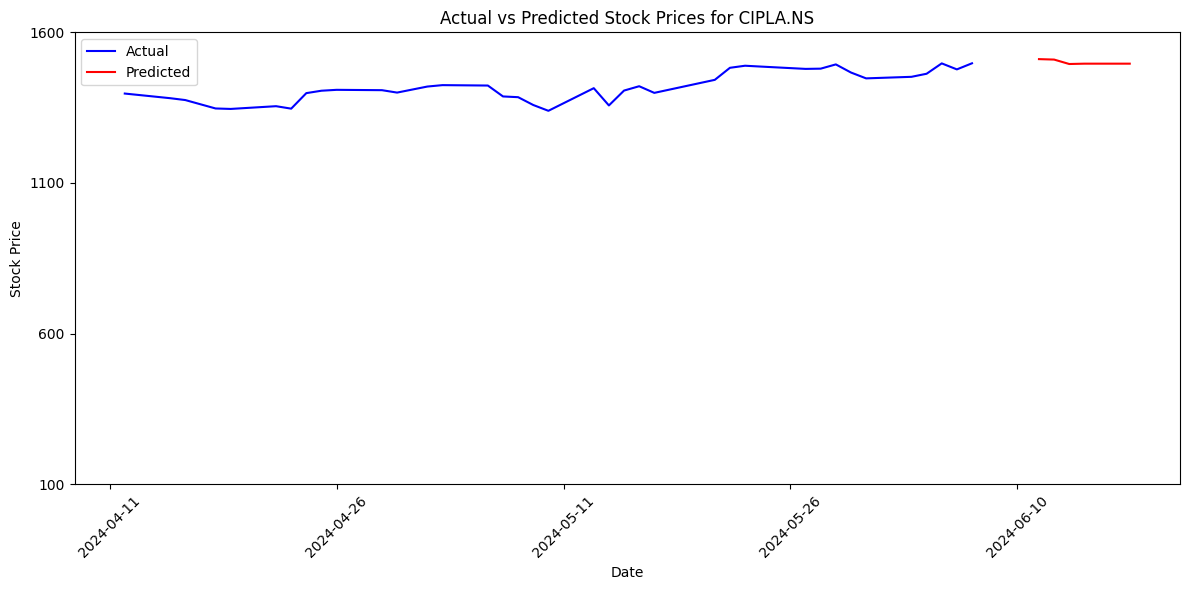

In [6]:
import yfinance as yf
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Function to download historical stock data
def download_stock_data(symbol, start_date, end_date):
    try:
        return yf.download(symbol, start=start_date, end=end_date)
    except Exception as e:
        print(f"Failed to download data for {symbol}: {e}")
        return None

# Get the list of NIFTY 50 stock symbols
nifty_50_symbols = [
    "RELIANCE.NS", "TCS.NS", "HDFCBANK.NS", "INFY.NS", "HINDUNILVR.NS",
    "ICICIBANK.NS", "KOTAKBANK.NS", "SBIN.NS", "BAJFINANCE.NS", "BHARTIARTL.NS",
    "HCLTECH.NS", "ITC.NS", "ASIANPAINT.NS", "AXISBANK.NS", "LT.NS",
    "MARUTI.NS", "ULTRACEMCO.NS", "SUNPHARMA.NS", "HDFCLIFE.NS", "WIPRO.NS",
    "NESTLEIND.NS", "POWERGRID.NS", "BAJAJFINSV.NS", "ADANIGREEN.NS", "TITAN.NS",
    "DIVISLAB.NS", "NTPC.NS", "TECHM.NS", "ADANIPORTS.NS", "GRASIM.NS",
    "BPCL.NS", "JSWSTEEL.NS", "HEROMOTOCO.NS", "TATAMOTORS.NS", "HINDALCO.NS",
    "UPL.NS", "ONGC.NS", "SHREECEM.NS", "SBILIFE.NS", "COALINDIA.NS",
    "DRREDDY.NS", "BRITANNIA.NS", "EICHERMOT.NS", "M&M.NS", "CIPLA.NS",
    "INDUSINDBK.NS", "TATACONSUM.NS", "BAJAJ-AUTO.NS", "ADANITRANS.NS", "APOLLOHOSP.NS"
]

# Define the time period (previous year till present)
start_date = pd.Timestamp.now() - pd.DateOffset(years=2)
end_date = pd.Timestamp.now()

# Download historical stock data for all NIFTY 50 stocks
stock_data = {}
for symbol in nifty_50_symbols:
    data = download_stock_data(symbol, start_date, end_date)
    if data is not None:
        stock_data[symbol] = data

# Combine all stock data into a single DataFrame
combined_data = pd.concat(stock_data.values(), keys=stock_data.keys(), names=['Stock', 'Date'])

# Calculate rolling mean and percentage change
combined_data['MA5'] = combined_data.groupby('Stock')['Close'].transform(lambda x: x.rolling(window=5).mean())
combined_data['MA10'] = combined_data.groupby('Stock')['Close'].transform(lambda x: x.rolling(window=10).mean())
combined_data['Return'] = combined_data.groupby('Stock')['Close'].transform(lambda x: x.pct_change())

# Drop rows with missing values
combined_data.dropna(inplace=True)

# Define features and target
X = combined_data[['MA5', 'MA10', 'Return']]
y = combined_data['Close']

# Train the model
model = xgb.XGBRegressor()
model.fit(X, y)

# User chooses the stock for prediction
print("Choose a stock for prediction:")
for symbol in nifty_50_symbols:
    print(symbol)

selected_stock_symbol = input("Enter the stock symbol for prediction (e.g., TCS.NS): ")
print(f"You selected: {selected_stock_symbol}")

# Filter data for the selected stock
selected_stock_data = combined_data.loc[selected_stock_symbol]

# Prepare data for future prediction
future_dates = pd.date_range(end_date, periods=8)[1:]  # Predict for the next 7 days
print(f"Future dates for prediction: {future_dates}")

# Initialize future data DataFrame
future_data = pd.DataFrame(index=future_dates, columns=['MA5', 'MA10', 'Return'])

# Get the last known data
last_known_data = selected_stock_data.iloc[-10:]  # Get the last 10 days for calculating rolling features

# Calculate the initial values for the future data
ma5 = last_known_data['Close'].rolling(window=5).mean().iloc[-1]
ma10 = last_known_data['Close'].rolling(window=10).mean().iloc[-1]
ret = last_known_data['Close'].pct_change().iloc[-1]

for i in range(len(future_data)):
    future_data.iloc[i] = [ma5, ma10, ret]
    # Update MA5, MA10, and Return for the next day
    last_close = future_data.iloc[i-1]['MA5'] if i > 0 else last_known_data['Close'].iloc[-1]
    ma5 = ((ma5 * 4) + last_close) / 5  # Update MA5
    ma10 = ((ma10 * 9) + last_close) / 10  # Update MA10
    ret = (last_close - ma5) / ma5  # Update Return

# Ensure future_data is of type float
future_data = future_data.astype(float)

print("Future data for prediction:")
print(future_data)

predicted_prices = model.predict(future_data)

print("Predicted Prices:")
print(predicted_prices)

# Plot actual and predicted prices
plt.figure(figsize=(12, 6))
last_2_months = selected_stock_data.loc[selected_stock_data.index > (end_date - pd.DateOffset(months=2))]
plt.plot(last_2_months.index, last_2_months['Close'], label='Actual', color='blue')
plt.plot(future_dates, predicted_prices, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f'Actual vs Predicted Stock Prices for {selected_stock_symbol}')
plt.legend()
plt.xticks(rotation=45)
plt.yticks(range(100, 2001, 500))  # Set y-axis ticks according to the specified price frame
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))  # Set x-axis ticks at 15-day intervals
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.tight_layout()
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Choose a stock for prediction:
RELIANCE.NS
TCS.NS
HDFCBANK.NS
INFY.NS
HINDUNILVR.NS
ICICIBANK.NS
KOTAKBANK.NS
SBIN.NS
BAJFINANCE.NS
BHARTIARTL.NS
HCLTECH.NS
ITC.NS
ASIANPAINT.NS
AXISBANK.NS
LT.NS
MARUTI.NS
ULTRACEMCO.NS
SUNPHARMA.NS
HDFCLIFE.NS
WIPRO.NS
NESTLEIND.NS
POWERGRID.NS
BAJAJFINSV.NS
ADANIGREEN.NS
TITAN.NS
DIVISLAB.NS
NTPC.NS
TECHM.NS
ADANIPORTS.NS
GRASIM.NS
BPCL.NS
JSWSTEEL.NS
HEROMOTOCO.NS
TATAMOTORS.NS
HINDALCO.NS
UPL.NS
ONGC.NS
SHREECEM.NS
SBILIFE.NS
COALINDIA.NS
DRREDDY.NS
BRITANNIA.NS
EICHERMOT.NS
M&M.NS
CIPLA.NS
INDUSINDBK.NS
TATACONSUM.NS
BAJAJ-AUTO.NS
ADANITRANS.NS
APOLLOHOSP.NS
Enter the stock symbol for prediction (e.g., TCS.NS): CIPLA.NS
You selected: CIPLA.NS
Future dates for prediction: DatetimeIndex(['2024-06-11 10:15:19.865043', '2024-06-12 10:15:19.865043',
               '2024-06-13 10:15:19.865043', '2024-06-14 10:15:19.865043',
               '2024-06-15 10:15:19.865043', '2024-06-16 10:15:19.865043',
               '2024-06-17 10:15:19.865043'],
          

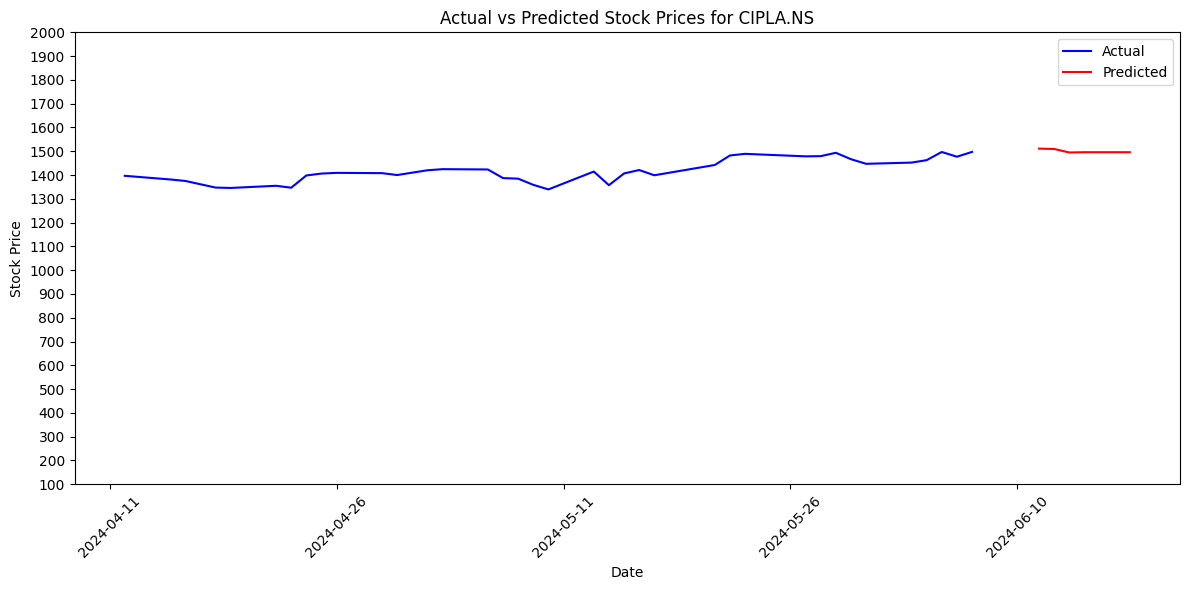

In [7]:
import yfinance as yf
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Function to download historical stock data
def download_stock_data(symbol, start_date, end_date):
    try:
        return yf.download(symbol, start=start_date, end=end_date)
    except Exception as e:
        print(f"Failed to download data for {symbol}: {e}")
        return None

# Get the list of NIFTY 50 stock symbols
nifty_50_symbols = [
    "RELIANCE.NS", "TCS.NS", "HDFCBANK.NS", "INFY.NS", "HINDUNILVR.NS",
    "ICICIBANK.NS", "KOTAKBANK.NS", "SBIN.NS", "BAJFINANCE.NS", "BHARTIARTL.NS",
    "HCLTECH.NS", "ITC.NS", "ASIANPAINT.NS", "AXISBANK.NS", "LT.NS",
    "MARUTI.NS", "ULTRACEMCO.NS", "SUNPHARMA.NS", "HDFCLIFE.NS", "WIPRO.NS",
    "NESTLEIND.NS", "POWERGRID.NS", "BAJAJFINSV.NS", "ADANIGREEN.NS", "TITAN.NS",
    "DIVISLAB.NS", "NTPC.NS", "TECHM.NS", "ADANIPORTS.NS", "GRASIM.NS",
    "BPCL.NS", "JSWSTEEL.NS", "HEROMOTOCO.NS", "TATAMOTORS.NS", "HINDALCO.NS",
    "UPL.NS", "ONGC.NS", "SHREECEM.NS", "SBILIFE.NS", "COALINDIA.NS",
    "DRREDDY.NS", "BRITANNIA.NS", "EICHERMOT.NS", "M&M.NS", "CIPLA.NS",
    "INDUSINDBK.NS", "TATACONSUM.NS", "BAJAJ-AUTO.NS", "ADANITRANS.NS", "APOLLOHOSP.NS"
]

# Define the time period (previous year till present)
start_date = pd.Timestamp.now() - pd.DateOffset(years=2)
end_date = pd.Timestamp.now()

# Download historical stock data for all NIFTY 50 stocks
stock_data = {}
for symbol in nifty_50_symbols:
    data = download_stock_data(symbol, start_date, end_date)
    if data is not None:
        stock_data[symbol] = data

# Combine all stock data into a single DataFrame
combined_data = pd.concat(stock_data.values(), keys=stock_data.keys(), names=['Stock', 'Date'])

# Calculate rolling mean and percentage change
combined_data['MA5'] = combined_data.groupby('Stock')['Close'].transform(lambda x: x.rolling(window=5).mean())
combined_data['MA10'] = combined_data.groupby('Stock')['Close'].transform(lambda x: x.rolling(window=10).mean())
combined_data['Return'] = combined_data.groupby('Stock')['Close'].transform(lambda x: x.pct_change())

# Drop rows with missing values
combined_data.dropna(inplace=True)

# Define features and target
X = combined_data[['MA5', 'MA10', 'Return']]
y = combined_data['Close']

# Train the model
model = xgb.XGBRegressor()
model.fit(X, y)

# User chooses the stock for prediction
print("Choose a stock for prediction:")
for symbol in nifty_50_symbols:
    print(symbol)

selected_stock_symbol = input("Enter the stock symbol for prediction (e.g., TCS.NS): ")
print(f"You selected: {selected_stock_symbol}")

# Filter data for the selected stock
selected_stock_data = combined_data.loc[selected_stock_symbol]

# Prepare data for future prediction
future_dates = pd.date_range(end_date, periods=8)[1:]  # Predict for the next 7 days
print(f"Future dates for prediction: {future_dates}")

# Initialize future data DataFrame
future_data = pd.DataFrame(index=future_dates, columns=['MA5', 'MA10', 'Return'])

# Get the last known data
last_known_data = selected_stock_data.iloc[-10:]  # Get the last 10 days for calculating rolling features

# Calculate the initial values for the future data
ma5 = last_known_data['Close'].rolling(window=5).mean().iloc[-1]
ma10 = last_known_data['Close'].rolling(window=10).mean().iloc[-1]
ret = last_known_data['Close'].pct_change().iloc[-1]

for i in range(len(future_data)):
    future_data.iloc[i] = [ma5, ma10, ret]
    # Update MA5, MA10, and Return for the next day
    last_close = future_data.iloc[i-1]['MA5'] if i > 0 else last_known_data['Close'].iloc[-1]
    ma5 = ((ma5 * 4) + last_close) / 5  # Update MA5
    ma10 = ((ma10 * 9) + last_close) / 10  # Update MA10
    ret = (last_close - ma5) / ma5  # Update Return

# Ensure future_data is of type float
future_data = future_data.astype(float)

print("Future data for prediction:")
print(future_data)

predicted_prices = model.predict(future_data)

print("Predicted Prices:")
print(predicted_prices)

# Plot actual and predicted prices
plt.figure(figsize=(12, 6))
last_2_months = selected_stock_data.loc[selected_stock_data.index > (end_date - pd.DateOffset(months=2))]
plt.plot(last_2_months.index, last_2_months['Close'], label='Actual', color='blue')
plt.plot(future_dates, predicted_prices, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f'Actual vs Predicted Stock Prices for {selected_stock_symbol}')
plt.legend()
plt.xticks(rotation=45)
plt.yticks(range(100, 2001, 100))  # Set y-axis ticks at 100-point intervals
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))  # Set x-axis ticks at 15-day intervals
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.tight_layout()
plt.show()
